In [101]:
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [102]:
from synabon.stat import generate_objects_ids

# Create object ids

In [103]:
df = generate_objects_ids(n_unique_objects=100, n_records_per_object=10)
df.head(10)

,object_id
0,1b125455-b947-4bb0-b6ce-386bed77a4fb
1,5f6291a6-7aa4-4d41-b5d0-09e908bbd570
2,5323059a-ddcb-4652-9c2a-158332f4a04d
3,21ceb36d-b815-45a4-8edd-82ef0fdcf200
4,b6d010f4-14fa-4385-9c3a-d3ea9a2f23c4
5,27c8159b-15f9-4cea-a566-8bc7e58fa288
6,cb7175a5-3a59-44b7-bfc3-f01d64a562ca
7,71b48380-de0b-4c4e-a30f-514a995e6494
8,c60bc368-bd07-4e17-8a6e-c8c23a34812f
9,17f45fe0-f61b-4794-8795-b28da81b586f


In [104]:
df.shape

(1000, 1)

In [105]:
df["object_id"].nunique()

100

# Add Date column to dataframe

In [106]:
from datetime import datetime

In [107]:
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [108]:
from synabon.stat import add_date

In [109]:
df = add_date(data=df, start_dt=start_dt, end_dt=end_dt, column_name="interaction_date")

In [110]:
df.head(10)

,object_id,interaction_date
0,1b125455-b947-4bb0-b6ce-386bed77a4fb,2023-01-24 22:31:45
1,5f6291a6-7aa4-4d41-b5d0-09e908bbd570,2023-01-05 19:12:35
2,5323059a-ddcb-4652-9c2a-158332f4a04d,2023-01-19 03:47:28
3,21ceb36d-b815-45a4-8edd-82ef0fdcf200,2023-01-16 10:09:04
4,b6d010f4-14fa-4385-9c3a-d3ea9a2f23c4,2023-01-29 00:03:35
5,27c8159b-15f9-4cea-a566-8bc7e58fa288,2023-01-20 20:46:54
6,cb7175a5-3a59-44b7-bfc3-f01d64a562ca,2023-01-02 17:13:38
7,71b48380-de0b-4c4e-a30f-514a995e6494,2023-01-27 04:26:13
8,c60bc368-bd07-4e17-8a6e-c8c23a34812f,2023-01-24 11:23:18
9,17f45fe0-f61b-4794-8795-b28da81b586f,2023-01-14 23:31:59


[Text(19358.0, 0, '2023-01-01'),
 Text(19362.0, 0, '2023-01-05'),
 Text(19366.0, 0, '2023-01-09'),
 Text(19370.0, 0, '2023-01-13'),
 Text(19374.0, 0, '2023-01-17'),
 Text(19378.0, 0, '2023-01-21'),
 Text(19382.0, 0, '2023-01-25'),
 Text(19386.0, 0, '2023-01-29'),
 Text(19389.0, 0, '2023-02-01')]

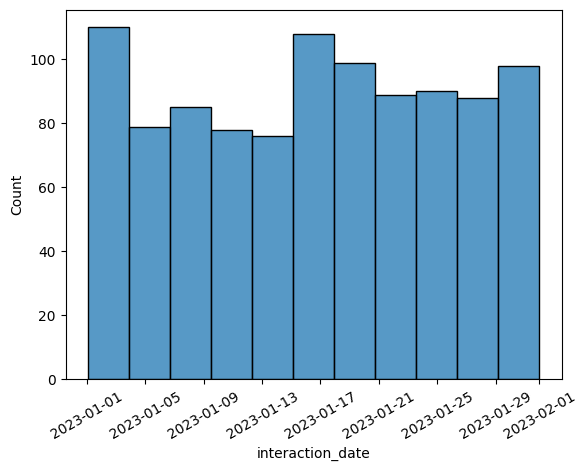

In [111]:
g = sns.histplot(data=df, x="interaction_date")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Add Category column to dataframe

In [112]:
from synabon.stat import add_category

In [113]:
values = ["Male", "Female", "Gender-Fluid"]
distribution = [0.4, 0.5, 0.1]

In [114]:
df = add_category(data=df, values=values, column_name="gender", distribution=distribution)

In [115]:
df.head()

,object_id,interaction_date,gender
0,1b125455-b947-4bb0-b6ce-386bed77a4fb,2023-01-24 22:31:45,Male
1,5f6291a6-7aa4-4d41-b5d0-09e908bbd570,2023-01-05 19:12:35,Male
2,5323059a-ddcb-4652-9c2a-158332f4a04d,2023-01-19 03:47:28,Female
3,21ceb36d-b815-45a4-8edd-82ef0fdcf200,2023-01-16 10:09:04,Female
4,b6d010f4-14fa-4385-9c3a-d3ea9a2f23c4,2023-01-29 00:03:35,Female


[Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Gender-Fluid')]

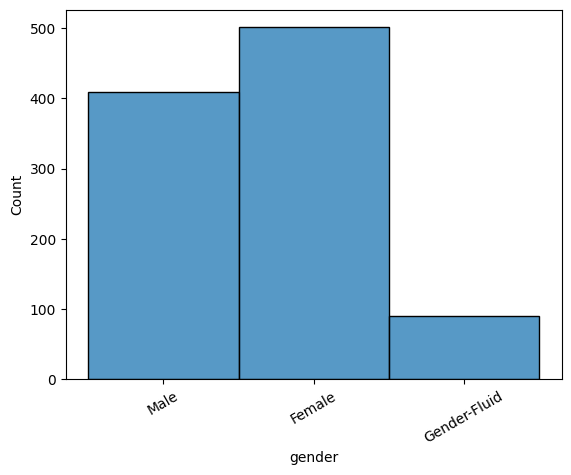

In [116]:
g = sns.histplot(data=df, x="gender")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Add exponential column to dataframe

In [117]:
from synabon.stat import add_exponential

In [118]:
df = add_exponential(data=df, column_name="money_spent", scale=100)

In [119]:
df.head()

,object_id,interaction_date,gender,money_spent
0,1b125455-b947-4bb0-b6ce-386bed77a4fb,2023-01-24 22:31:45,Male,209.819604
1,5f6291a6-7aa4-4d41-b5d0-09e908bbd570,2023-01-05 19:12:35,Male,146.654332
2,5323059a-ddcb-4652-9c2a-158332f4a04d,2023-01-19 03:47:28,Female,406.244486
3,21ceb36d-b815-45a4-8edd-82ef0fdcf200,2023-01-16 10:09:04,Female,11.090601
4,b6d010f4-14fa-4385-9c3a-d3ea9a2f23c4,2023-01-29 00:03:35,Female,223.472572


<Axes: xlabel='money_spent', ylabel='Density'>

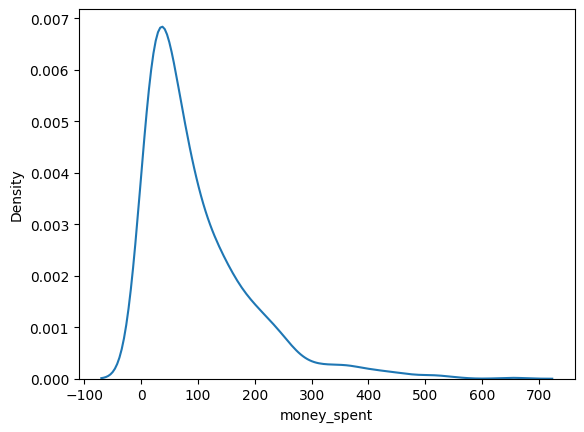

In [120]:
sns.kdeplot(x="money_spent", data=df)

<Axes: xlabel='money_spent', ylabel='Density'>

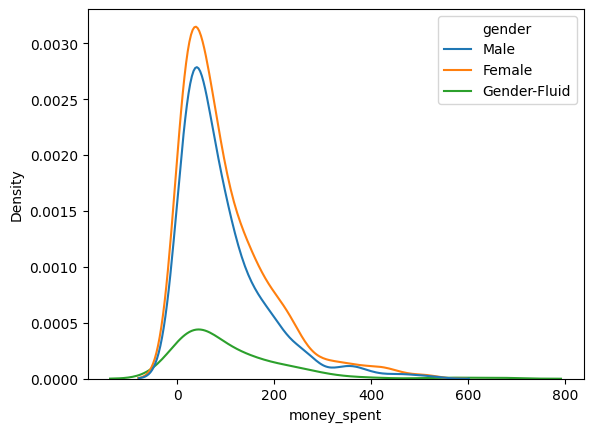

In [121]:
sns.kdeplot(x="money_spent", hue="gender", data=df)

In [122]:
df_sorted = df.sort_values(by="interaction_date")
df_sorted.head()

,object_id,interaction_date,gender,money_spent
603,5c38e6dd-84ed-4e15-88e3-386220344704,2023-01-01 01:46:55,Male,144.913081
441,fcbe878e-17ce-4c99-b79a-f95898cfcbdf,2023-01-01 02:32:28,Female,151.516958
494,c180e757-5976-438b-94f4-a87a4dc50ca5,2023-01-01 03:05:39,Female,4.730720
438,11fd3820-9409-40df-9c7a-61b26140d91a,2023-01-01 04:28:49,Female,93.007992
380,71b48380-de0b-4c4e-a30f-514a995e6494,2023-01-01 04:51:22,Male,97.626223


In [123]:
df_sorted.tail()

,object_id,interaction_date,gender,money_spent
712,c180e757-5976-438b-94f4-a87a4dc50ca5,2023-01-31 21:59:00,Female,220.357053
108,2eeef5c2-f002-45a3-acf2-4ec563027e12,2023-01-31 22:20:53,Male,7.831006
966,ada65e0f-ee79-4e47-b6ed-ee4e43a80cc8,2023-01-31 23:26:34,Gender-Fluid,5.498189
291,38b00508-0f2a-4d80-a193-68a59a3ae14b,2023-01-31 23:34:14,Female,6.249821
981,73d61f5a-3cb5-4bb5-adbd-285215dddd85,2023-01-31 23:43:07,Male,2.135952


In [124]:
df_sorted["cumsum"] = df_sorted["money_spent"].cumsum()

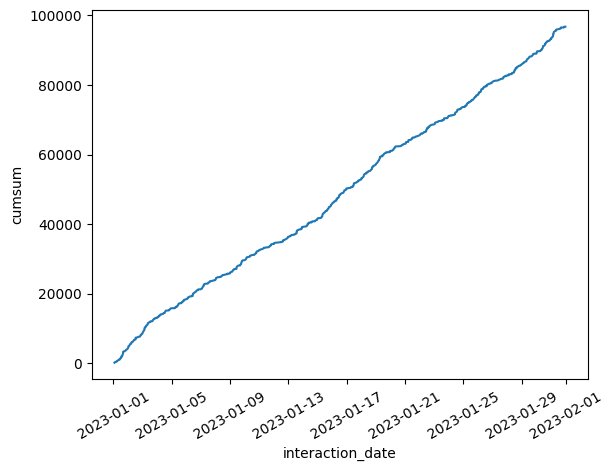

In [125]:
g = sns.lineplot(x="interaction_date", y="cumsum", data=df_sorted)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [126]:
df_sorted["day_dt"] = df_sorted["interaction_date"].dt.strftime("%Y/%m/%d")
df_day = df_sorted.groupby("day_dt")["money_spent"].sum().reset_index(name="total_day")
df_day.head()

,day_dt,total_day
0,2023/01/01,4261.980746
1,2023/01/02,4266.103029
2,2023/01/03,4483.898281
3,2023/01/04,2768.193279
4,2023/01/05,2501.002194


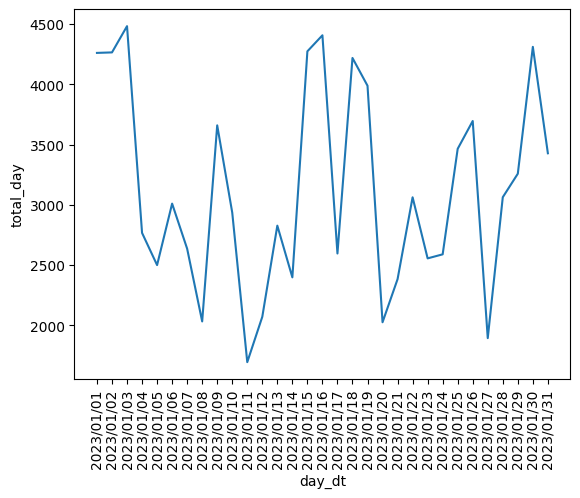

In [127]:
g = sns.lineplot(x="day_dt", y="total_day", data=df_day)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Split data into 2 groups: control ans treatment

In [128]:
from synabon.split import random_split

In [129]:
control, treatment = random_split(df, fraction=0.5)

<Axes: xlabel='money_spent', ylabel='Density'>

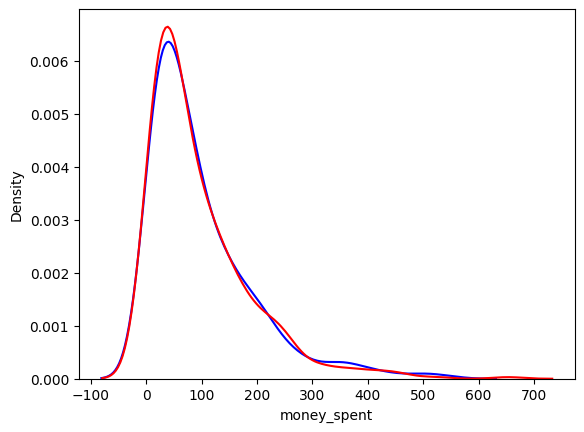

In [130]:
sns.kdeplot(x="money_spent", data=control, color="b")
sns.kdeplot(x="money_spent", data=treatment, color="r")

# Simulate Experiment Time

In [131]:
from synabon.stat import get_experiment_data

In [132]:
from datetime import timedelta

In [133]:
target_column = "money_spent"
date_column = "interaction_date"
experiment_duration = timedelta(days=30)

In [134]:
control_experiment, treatment_experiment = get_experiment_data(
    control, treatment,
    target_column=target_column,
    date_column=date_column,
    experiment_duration=experiment_duration,
    effect_size=1.2
)

<Axes: xlabel='money_spent', ylabel='Density'>

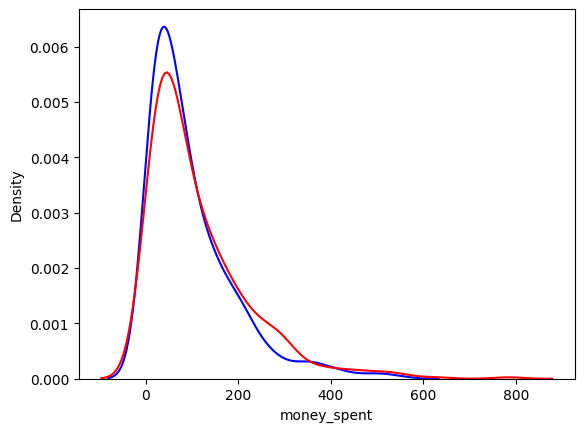

In [135]:
sns.kdeplot(x="money_spent", data=control_experiment, color="b")
sns.kdeplot(x="money_spent", data=treatment_experiment, color="r")

In [136]:
C = control_experiment["money_spent"].values
T = treatment_experiment["money_spent"].values
np.mean(C), np.mean(T)

(98.10749948855799, 114.44159935355952)

# Stat Test

In [137]:
import scipy.stats as sps

In [138]:
sps.ttest_ind(control_experiment["money_spent"].values, treatment_experiment["money_spent"].values, equal_var=False)

TtestResult(statistic=-2.509008229735436, pvalue=0.012268429721855253, df=974.4258055980765)

In [139]:
import numpy as np

In [140]:
C = control_experiment["money_spent"].values
T = treatment_experiment["money_spent"].values
(np.mean(C) - np.mean(T)) / ((np.var(C, ddof=1)/len(C) + np.var(T, ddof=1)/len(T)))**(1/2)

-2.5090082297354357